In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
sub = ['Bitcoincash', 'bitcoin', 'Ethereum', 'Vechain', 'Eos', 'Ripple']
csv1, csv2, csv3, csv4 = ([] for i in range(4))
for i in sub:
    csv1.append(i + '_controversial.csv')
    csv2.append(i + '_hot.csv')
    csv3.append(i + '_new.csv')
    csv4.append(i + '_top.csv')

In [5]:
csvx = csv1 + csv2 + csv3 + csv4
loc, sen, dir1 = ([] for i in range(3))
for i in range(4):
    for j in sub:
        dir1.append(j.lower())    
for (i, j) in zip(csvx, dir1):
    sen.append(f'./{j.lower()}/{i[:-4].lower()}_sentiment2.csv')
    loc.append(f'./{j.lower()}/{i[:-4].lower()}_sentiment1.csv')

In [6]:
csv1x = []
for i, j in zip(csvx, dir1):
    csv1x.append(f'{i.lower()[:-4]} vs. {j.lower()}_price')

In [32]:
pattern = re.compile(r'^\d{2}-\d{2}-\d{2}')
for g, h in zip(loc, sen):
    time, drop = ([] for i in range(2))
    ix = -1
    df = pd.read_csv(g)
    for i in df.date:
        ix += 1
        x = pattern.findall(str(i))
        if len(x) > 0:
            for j in x:
                time.append('20' + j)
        else:
            df.drop(ix, inplace = True)
            drop.append(ix)
    df['date'] = pd.DataFrame({'date' : time})
    scorexcomp = []
    t1, t2 = (0 for i in range(2))
    for i, j, k in zip(df.score, df.comp, df.num):
        if i > 0:
            t1 += 1
            scorexcomp.append((i * j))
        else:
            t2 += 1
            scorexcomp.append(abs(i) * j)
    df['scorexcomp'] = pd.DataFrame({'scorexcomp' : scorexcomp})
    sys.stdout.write(f'\rdropped: {drop} positive score: {t1} negative score: {t2}')
    dt = pd.DataFrame({'date' : df.date, 'scorexcomp' : df.scorexcomp})
    dt['dt'] = pd.to_datetime(dt.date)
    dt.set_index('dt', inplace = True)
    dt.sort_index(inplace = True)
    dt.reset_index(drop = True, inplace = True)
    roll = []
    ixsc = 0
    ixr = 0
    for i in dt.scorexcomp:
        ixsc += i
        ixr += 1
        roll.append(ixsc / ixr)
    dt['scorexcomp'] = pd.DataFrame({'scorexcomp' : roll})
    dt['date'] = dt.date
    dt.set_index('date', inplace = True)
    dt.sort_index(inplace = True)
#     dt.reset_index(drop = True, inplace = True)
    dt.to_csv(h, columns = dt)
    print(f'\nconverted dates: {h}\n')

dropped: [] positive score: 8835 negative score: 1644
converted dates: ./bitcoincash/bitcoincash_controversial_sentiment2.csv

dropped: [] positive score: 49223 negative score: 12003
converted dates: ./bitcoin/bitcoin_controversial_sentiment2.csv

dropped: [] positive score: 17364 negative score: 3726
converted dates: ./ethereum/ethereum_controversial_sentiment2.csv

dropped: [] positive score: 15473 negative score: 1911
converted dates: ./vechain/vechain_controversial_sentiment2.csv

dropped: [] positive score: 12635 negative score: 1454
converted dates: ./eos/eos_controversial_sentiment2.csv

dropped: [] positive score: 19985 negative score: 3058
converted dates: ./ripple/ripple_controversial_sentiment2.csv

dropped: [] positive score: 1309 negative score: 213
converted dates: ./bitcoincash/bitcoincash_hot_sentiment2.csv

dropped: [] positive score: 11224 negative score: 1264
converted dates: ./bitcoin/bitcoin_hot_sentiment2.csv

dropped: [] positive score: 5246 negative score: 764
c

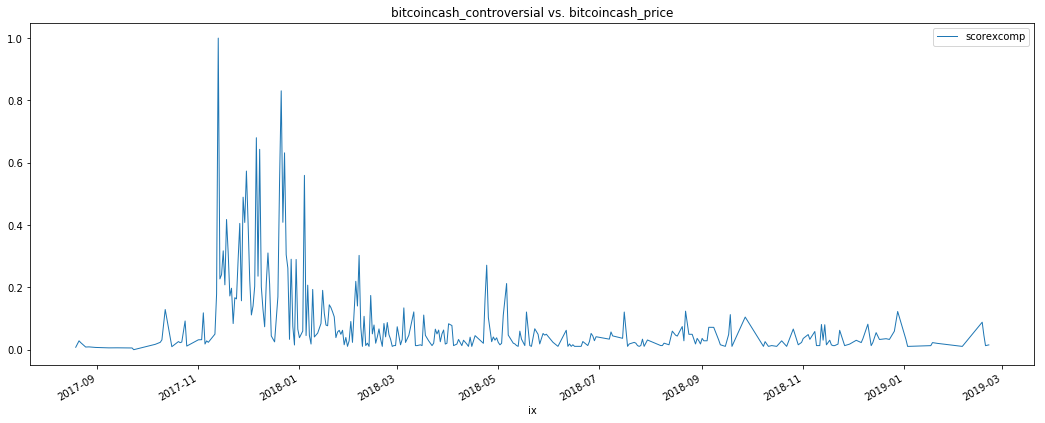

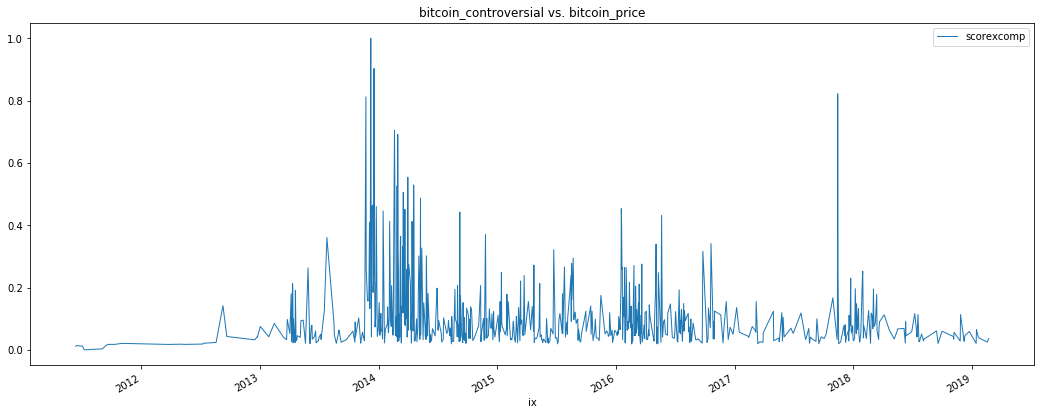

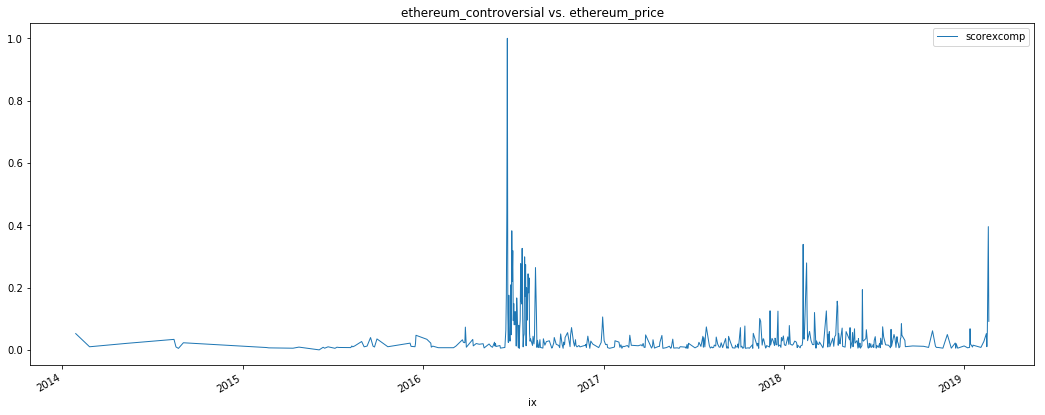

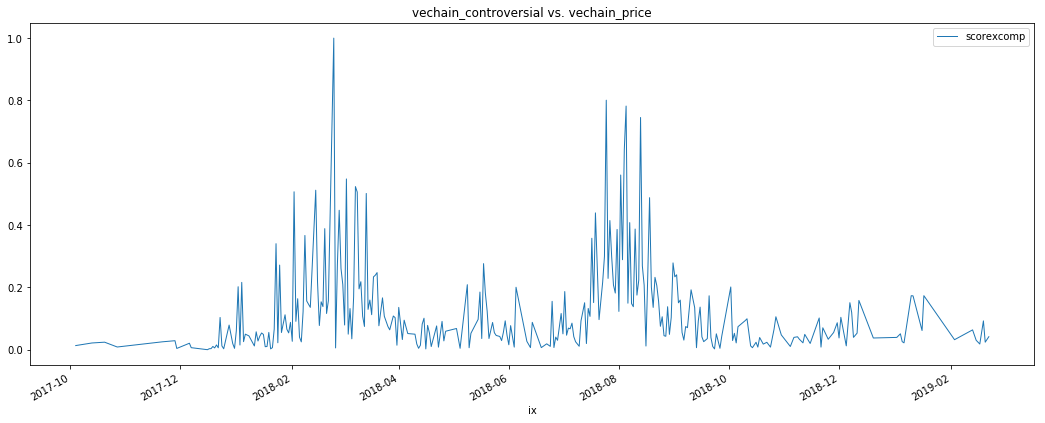

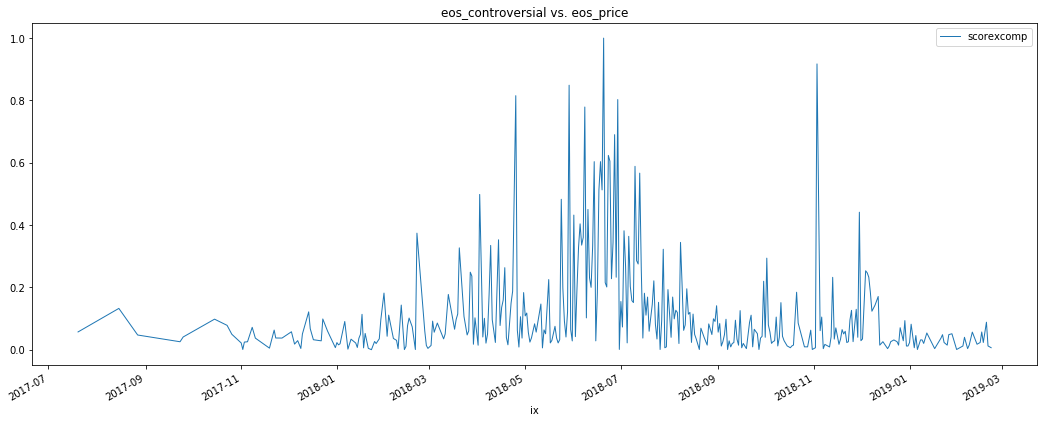

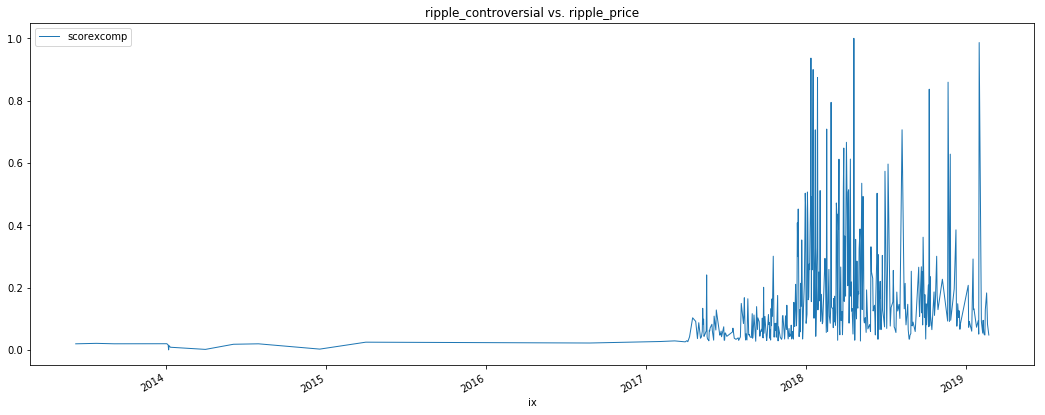

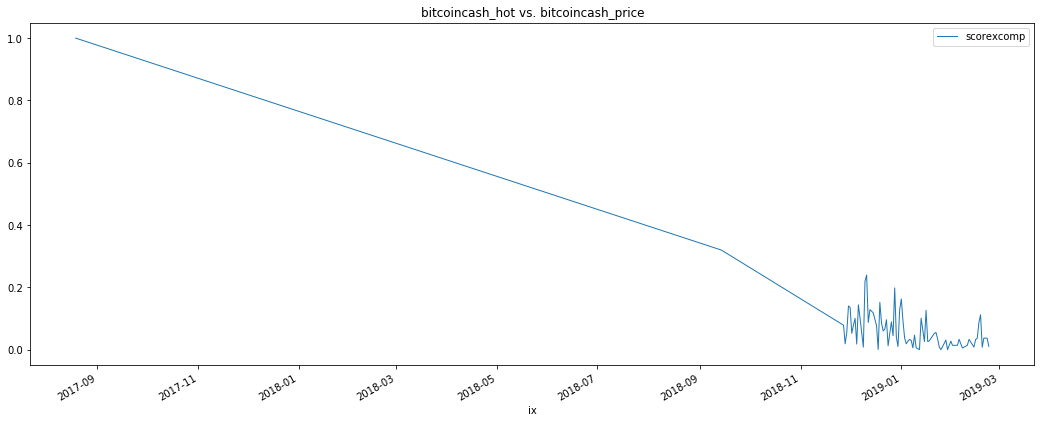

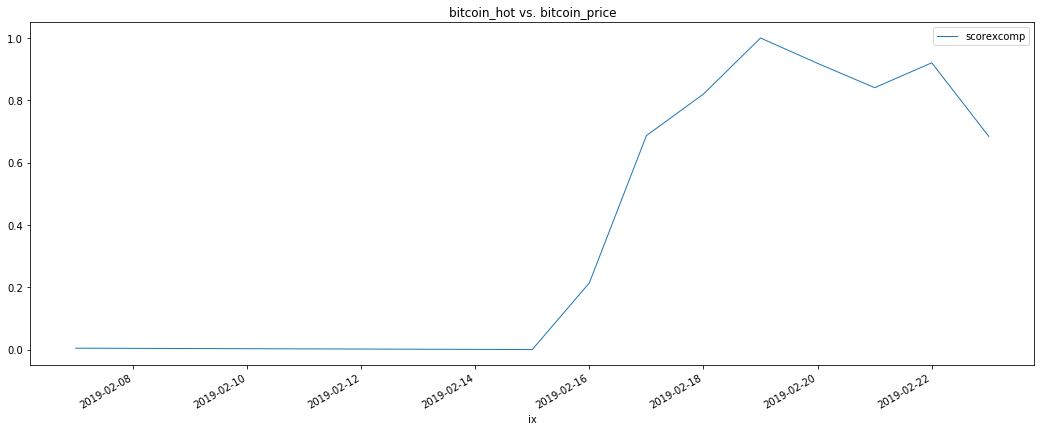

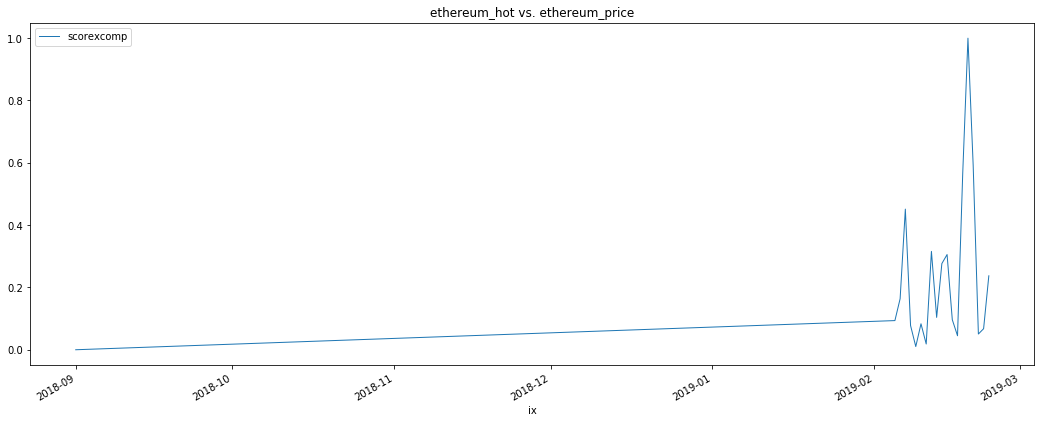

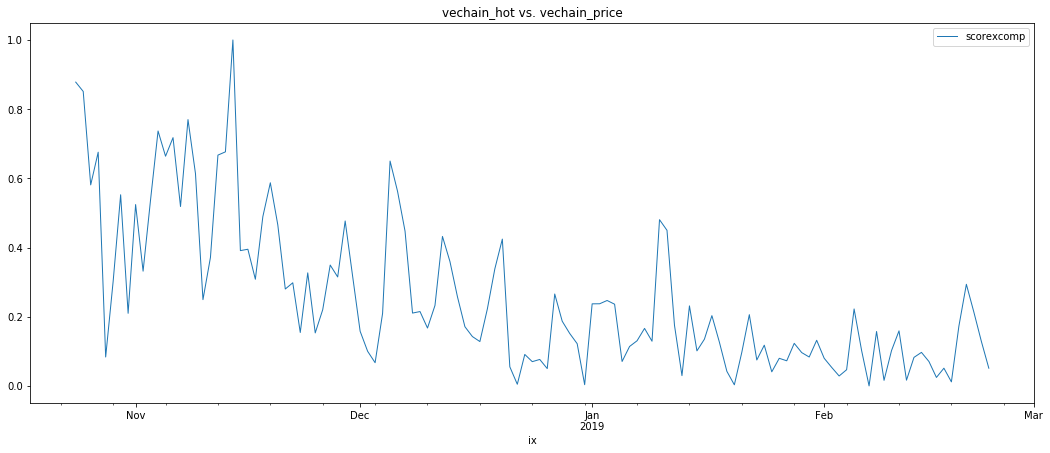

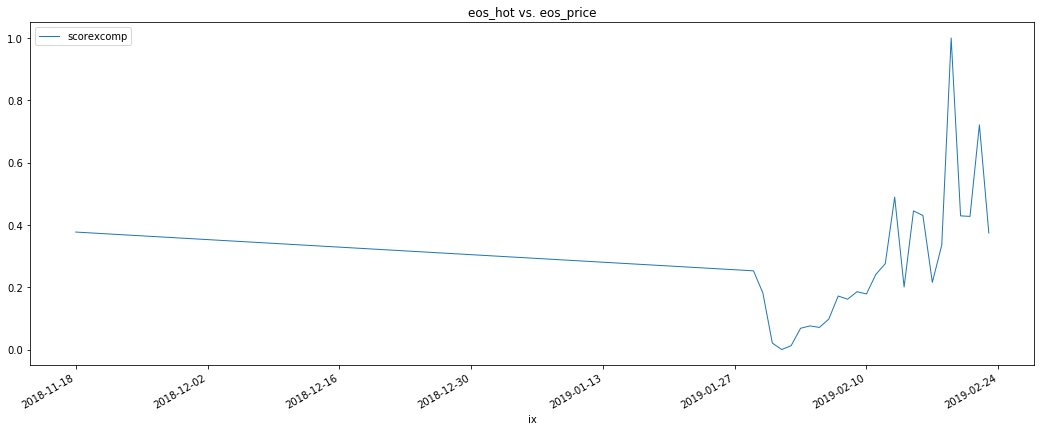

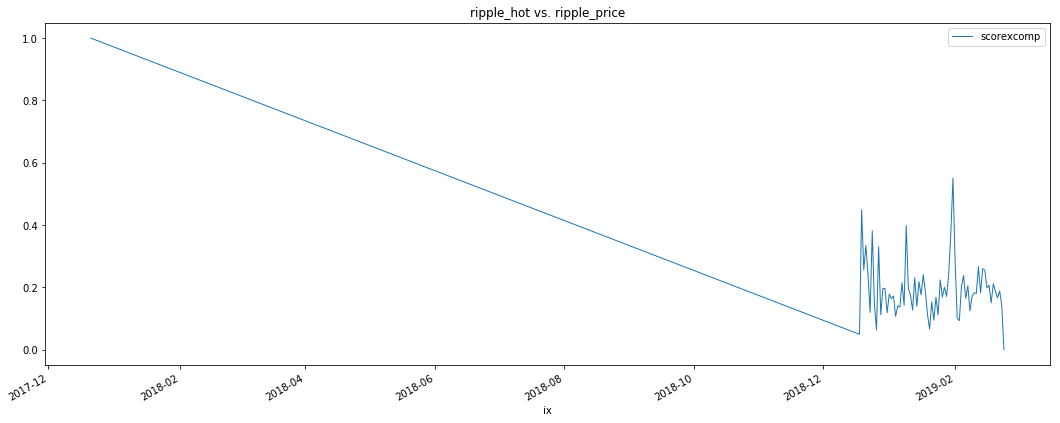

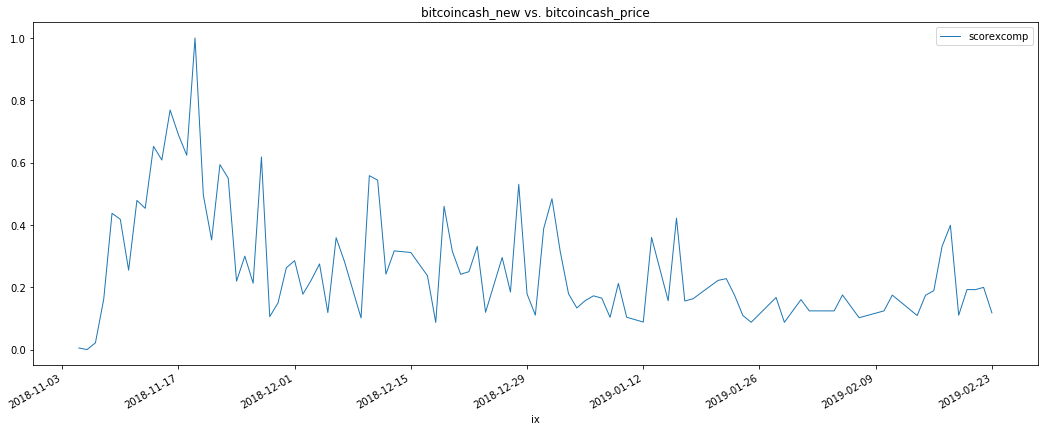

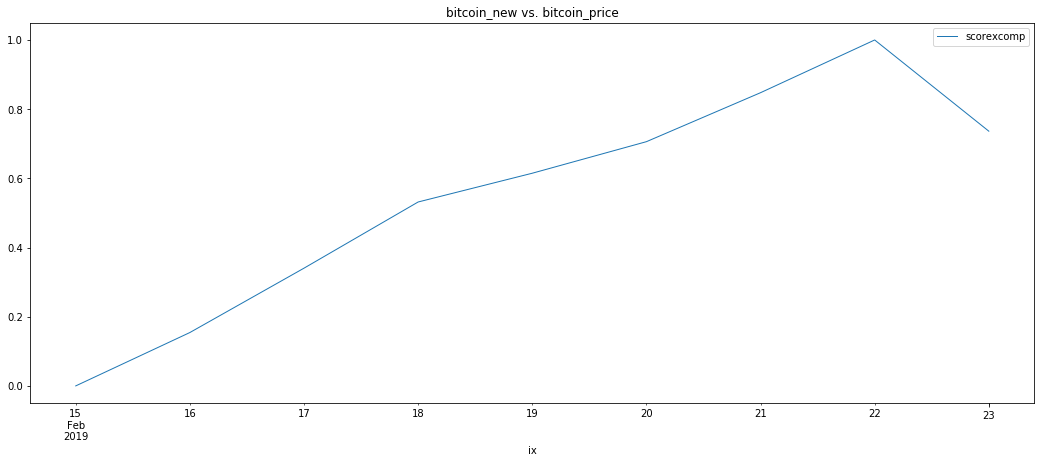

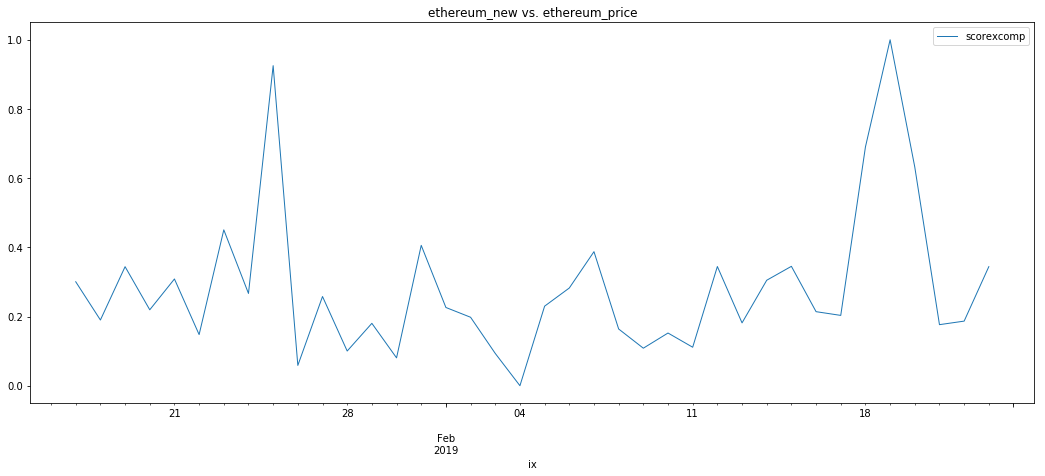

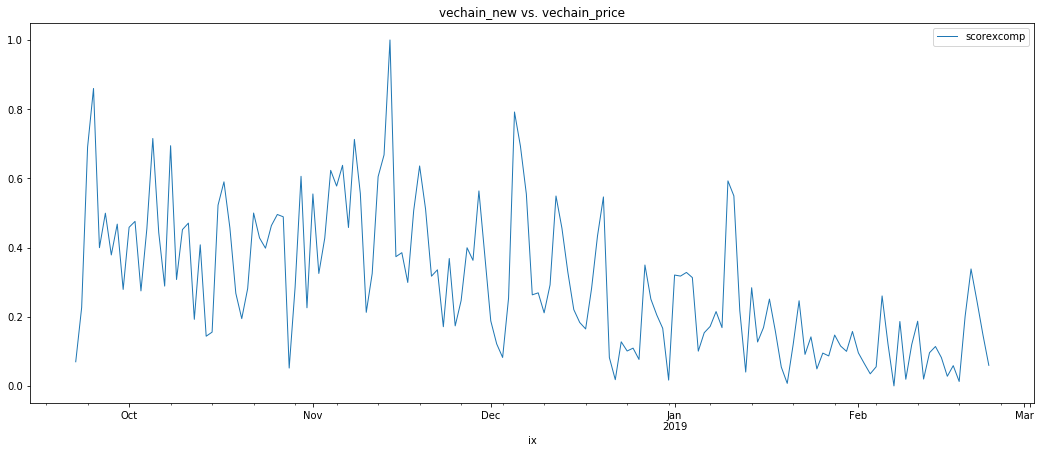

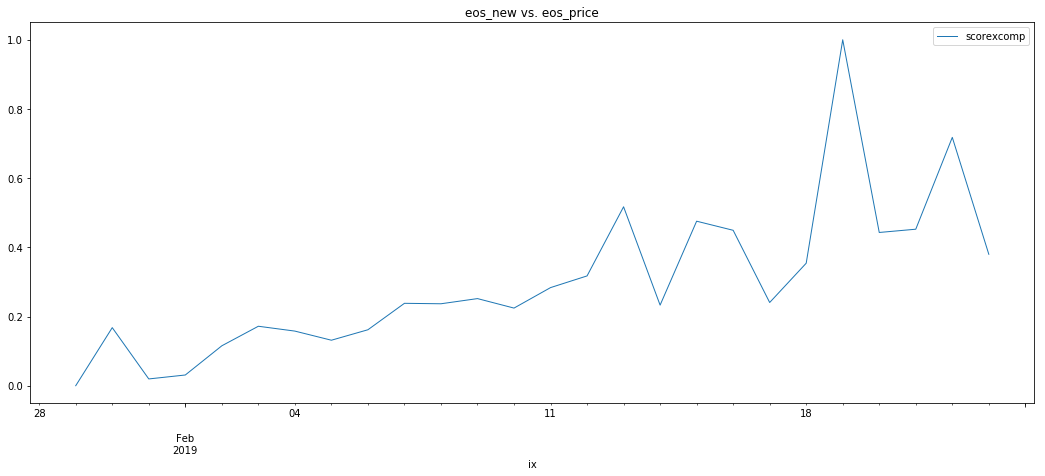

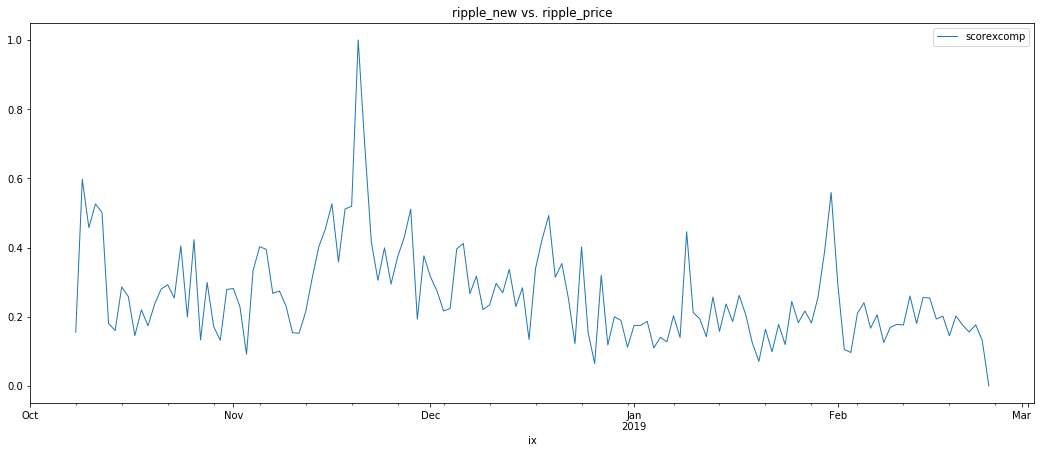

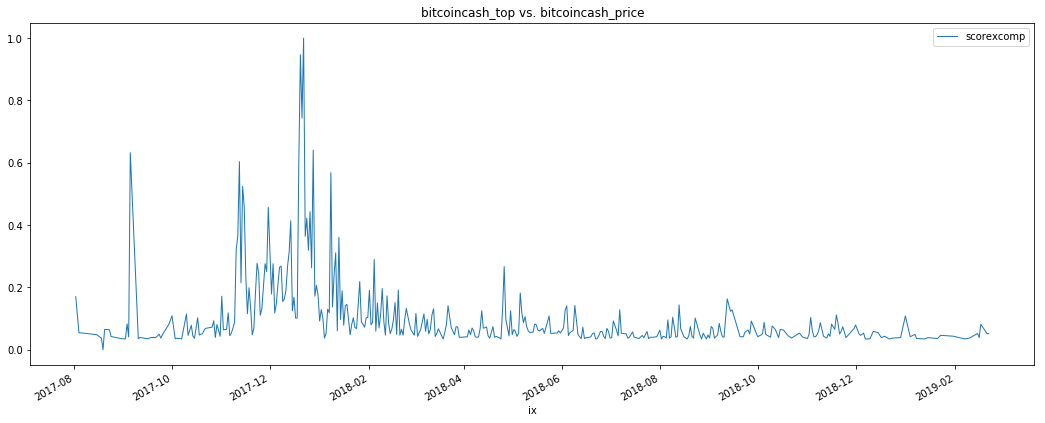

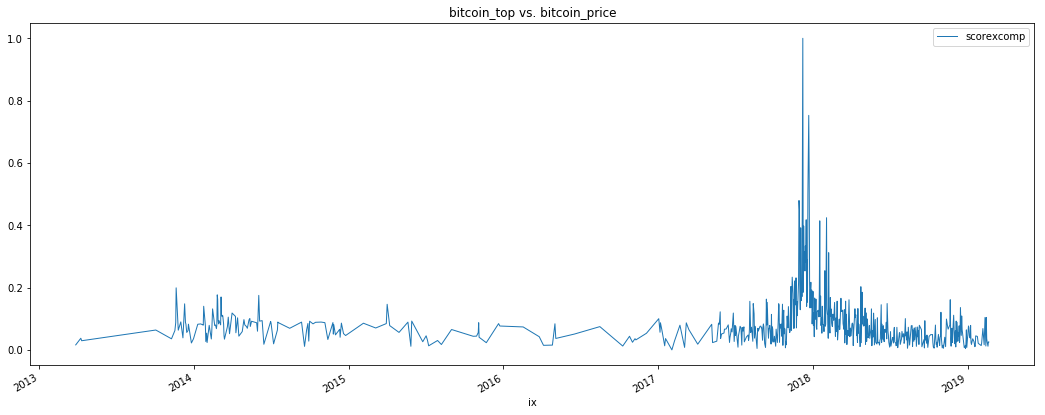

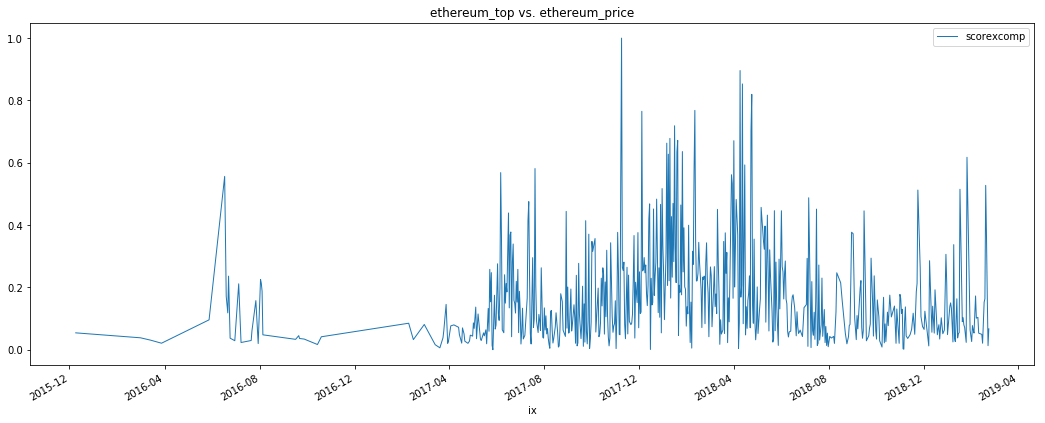

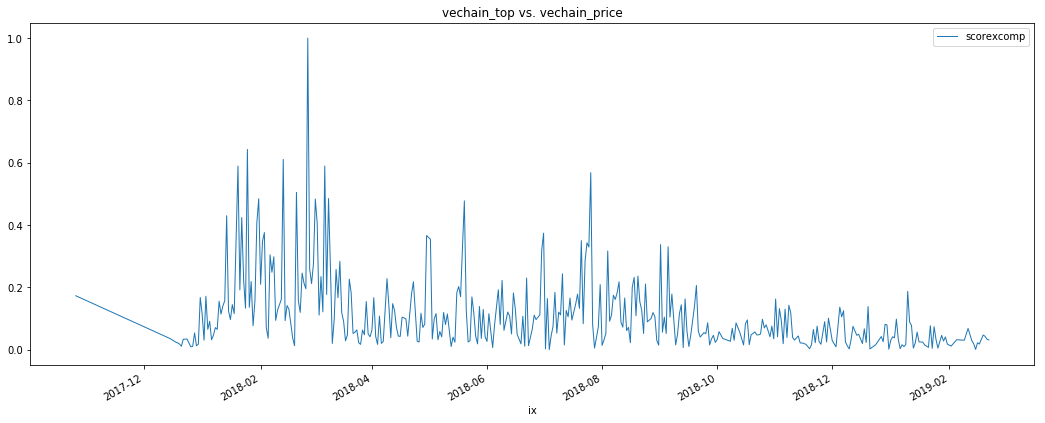

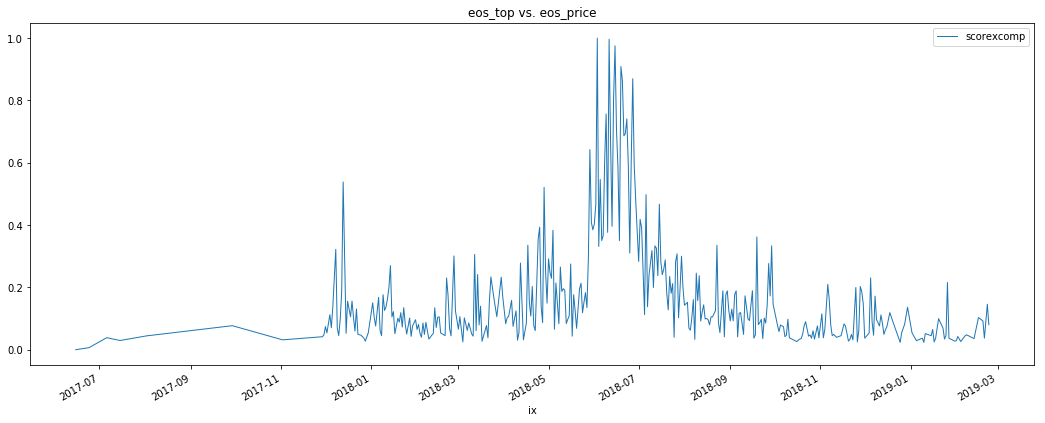

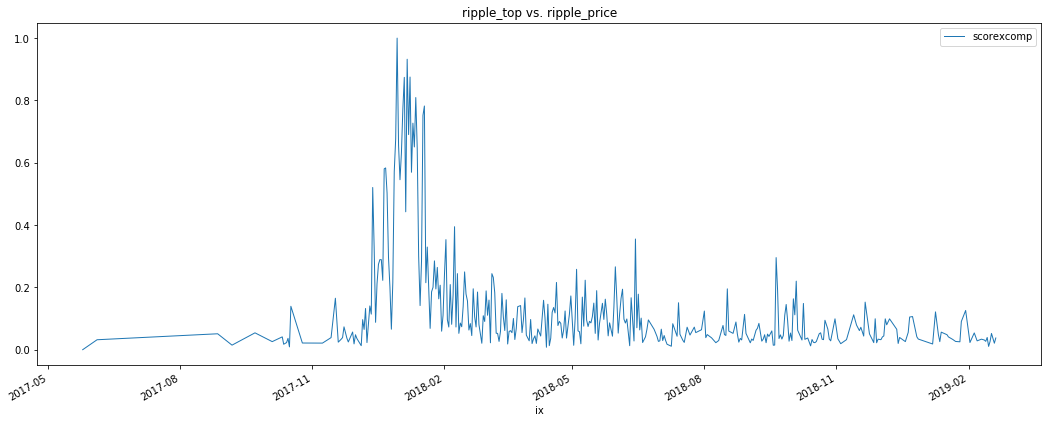

In [33]:
ix1 = 0
for i, j in zip(sen, dir1):
    df = pd.read_csv(i)
    df = df.groupby(['date'])['scorexcomp'].sum()
    df = df.to_frame()
    nc = [i for i in df.columns if i != 'date']
    df.ix[:, nc] = (df.ix[:, nc] - df.ix[:, nc].min()) / (df.ix[:, nc].max() - df.ix[:, nc].min())
    df['ix'] = df.index
    df['ix'] = pd.to_datetime(df['ix'])
    df.set_index('ix', inplace = True)
    df.sort_index(inplace = True)
    df.plot(lw=1, figsize=(18,7), title = csv1x[ix1])
    plt.savefig(f'{j}{ix1}2.jpg')
    ix1 += 1

dropped: []

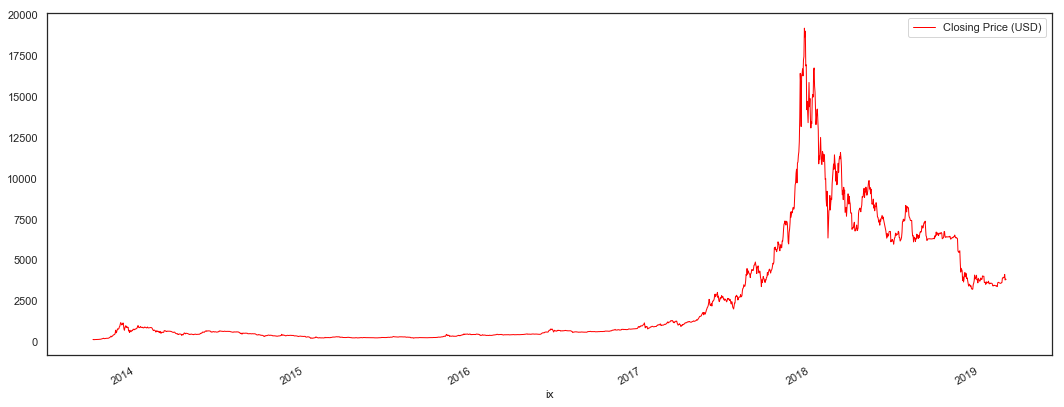

In [20]:
pattern = re.compile(r'^\d{4}-\d{2}-\d{2}')
time, drop = ([] for i in range(2))
ix = -1
dfbtc = pd.read_csv('./BTC_USD_2013-10-01_2019-02-27-CoinDesk.csv')
dfbtc.drop(dfbtc.columns[-3:], axis = 1, inplace = True)
for i in dfbtc.Date:
    ix += 1
    x = pattern.findall(str(i))
    if len(x) > 0:
        time.append(x[0])
    else:
        dfbtc.drop(ix, inplace = True)
        drop.append(ix)
    sys.stdout.write(f'\rdropped: {drop}')
dfbtc.drop(['Currency', 'Date'], axis = 1, inplace = True)
dfbtc['ix'] = pd.DataFrame({'ix' : time})
dfbtc['ix'] = pd.to_datetime(dfbtc['ix'])
dfbtc.set_index('ix', inplace = True)
dfbtc.sort_index(inplace = True)
dfbtc.plot(lw=1, figsize=(18,7), color = 'red')

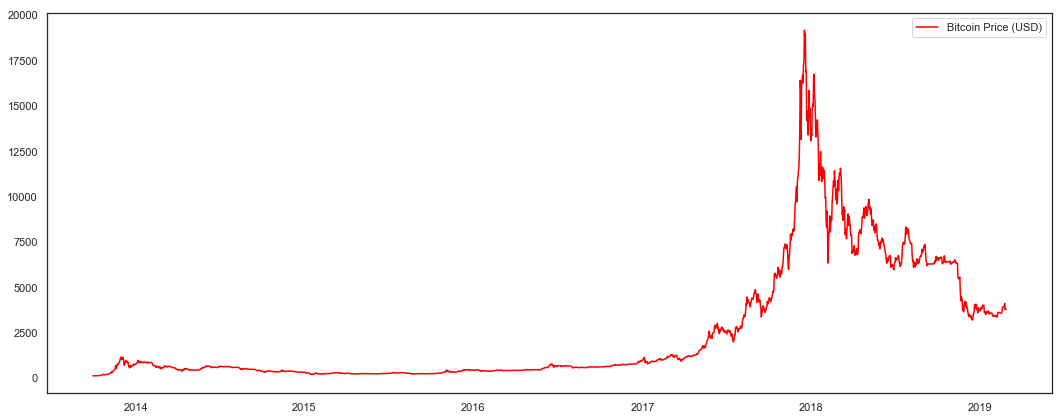

In [17]:
sns.set(style="white", palette="muted", color_codes=False)
ax = plt.subplots(figsize = (18,7))
ax = sns.lineplot(data=dfbtc['Closing Price (USD)'], color='red', label='Bitcoin Price (USD)')
plt.savefig(f'bitcoinall.jpg')

dropped: []

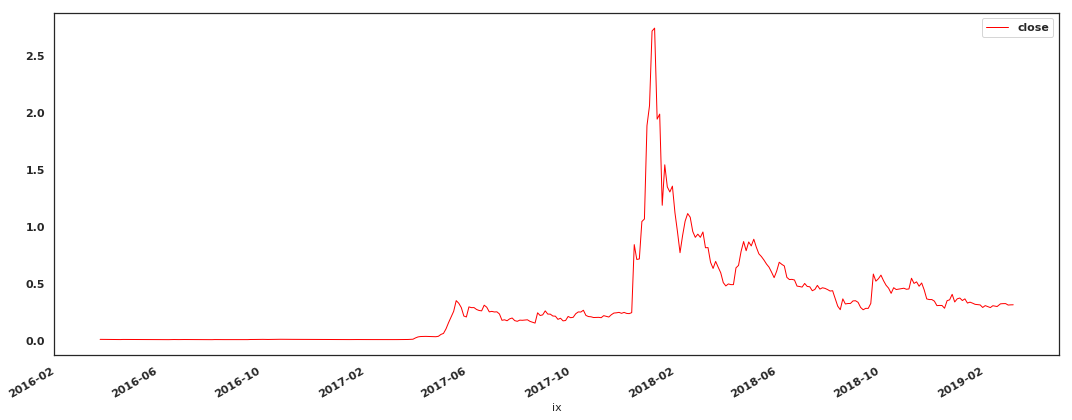

In [47]:
pattern = re.compile(r'^\d{4}-\d{2}-\d{2}')
time, drop = ([] for i in range(2))
ix = -1
df = pd.read_csv('./exchanges - XRP-USD.csv')
dfbtc = df[['close', 'close_time']]
for i in dfbtc.close_time:
    ix += 1
    x = pattern.findall(str(i))
    if len(x) > 0:
        time.append(x[0])
    else:
        dfbtc.drop(ix, inplace = True)
        drop.append(ix)
    sys.stdout.write(f'\rdropped: {drop}')
dfbtc.drop(['close_time'], axis = 1, inplace = True)
dfbtc['ix'] = pd.DataFrame({'ix' : time})
dfbtc['ix'] = pd.to_datetime(dfbtc['ix'])
dfbtc.set_index('ix', inplace = True)
dfbtc.sort_index(inplace = True)
dfbtc.plot(lw=1, figsize=(18,7), color = 'red')

In [134]:
dfbtc.head()

,close
ix,
2013-02-26,0.000500
2013-03-01,0.000526
2013-03-04,0.001664
2013-03-07,0.000990
2013-03-10,0.001000


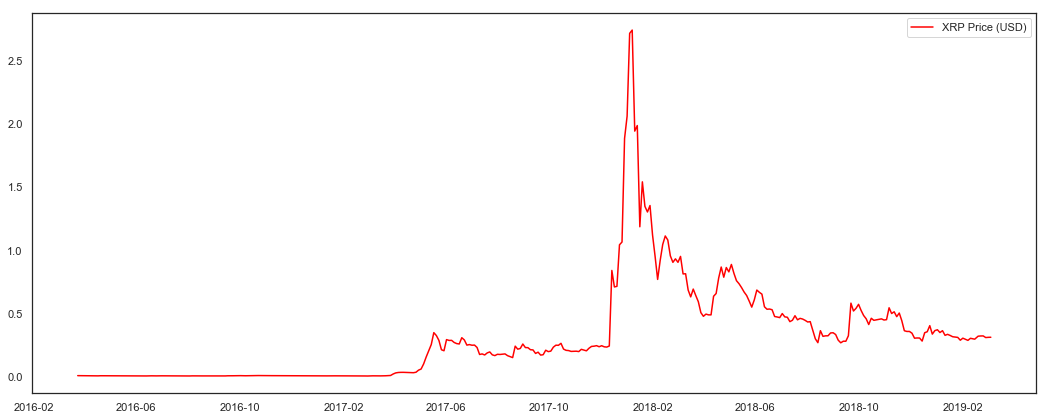

In [19]:
sns.set(style="white", palette="muted", color_codes=False)
ax = plt.subplots(figsize = (18,7))
ax = sns.lineplot(data=dfbtc['close'], color='red', label='XRP Price (USD)')
plt.savefig(f'xrpall.jpg')

In [21]:
dfbtc = dfbtc.rename(columns = {'Closing Price (USD)' : 'Bitcoin Price (USD)'})

In [42]:
pls = ['controversial', 'hot', 'new', 'top']

In [26]:
sen[1::6]

['./bitcoin/bitcoin_controversial_sentiment2.csv',
 './bitcoin/bitcoin_hot_sentiment2.csv',
 './bitcoin/bitcoin_new_sentiment2.csv',
 './bitcoin/bitcoin_top_sentiment2.csv']

In [43]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 11,
          'figure.figsize': (18, 7),
         'axes.labelsize': 11,
         'axes.titlesize': 16,
         'xtick.labelsize': 11,
         'ytick.labelsize': 11}
pylab.rcParams.update(params)

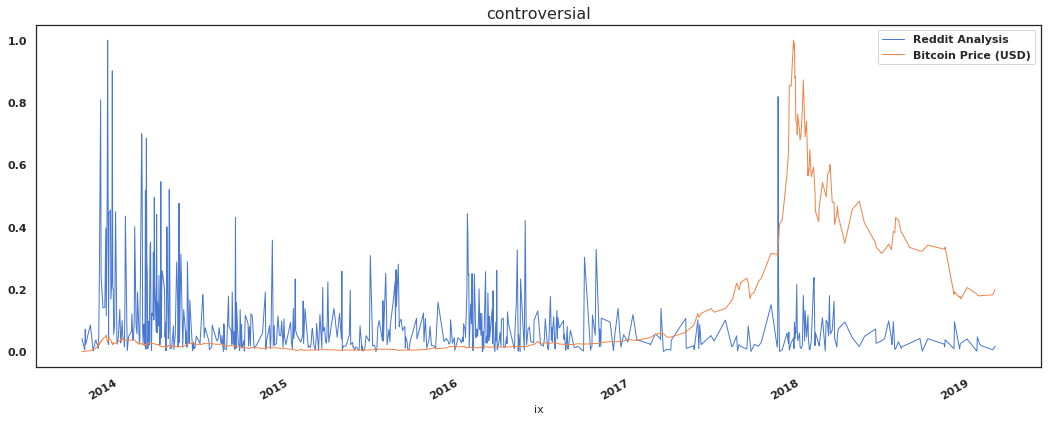

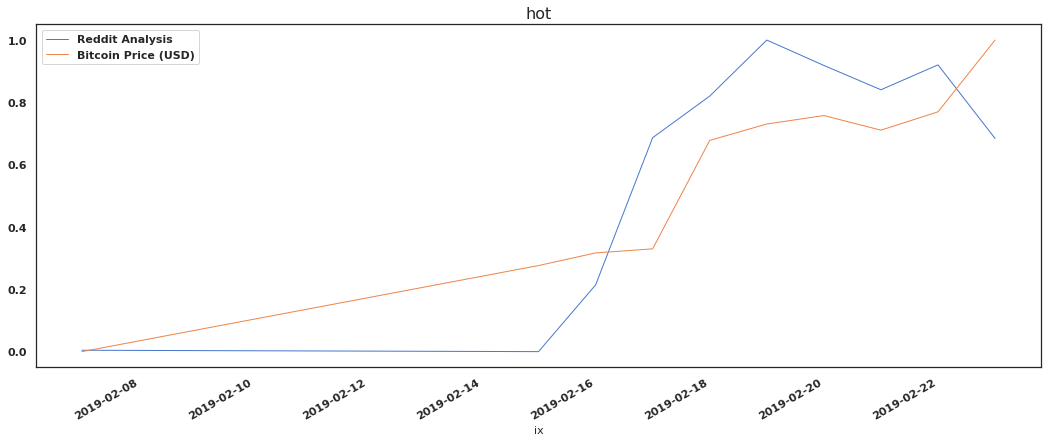

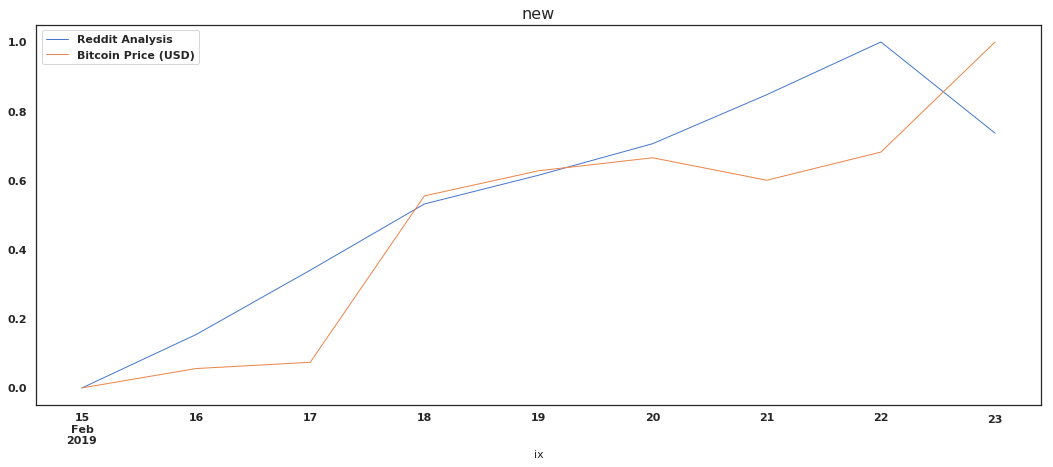

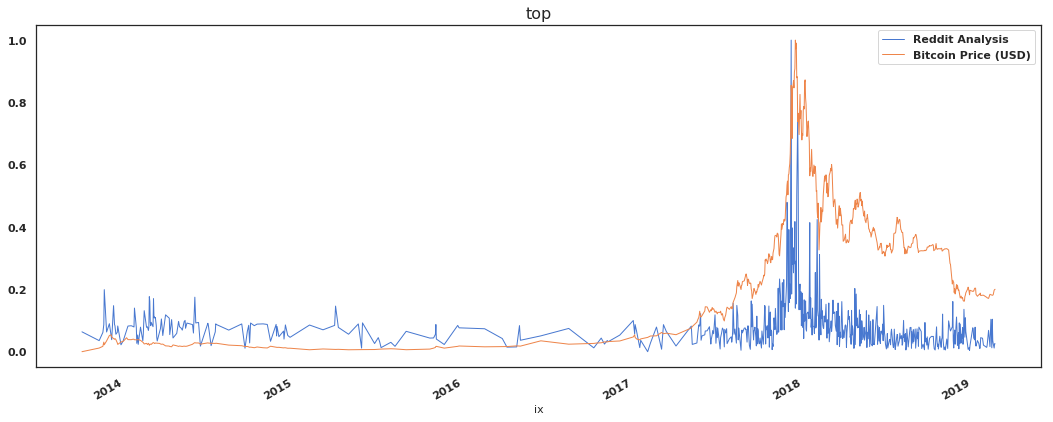

In [46]:
ntx = 0
for i, j in zip(sen[1::6], pls):
    df = pd.read_csv(i)
    df = df.groupby(['date'])['scorexcomp'].sum()
    df = df.to_frame()
    df = df.rename(columns = {'scorexcomp' : 'Reddit Analysis'})
    df['ix'] = df.index
    df['ix'] = pd.to_datetime(df['ix'])
    df.set_index('ix', inplace = True)
    df.sort_index(inplace = True)
    merge = pd.merge(df, dfbtc, on='ix', how='inner')
    nc = [i for i in merge.columns if i != 'date']
    merge.ix[:, nc] = (merge.ix[:, nc] - merge.ix[:, nc].min()) / (merge.ix[:, nc].max() - merge.ix[:, nc].min())
    merge.sort_index(inplace = True)
    merge.plot(lw=1, figsize=(18,7))
    plt.title(j)
    plt.savefig(f'nt{ntx}.jpg')
    ntx += 1

In [66]:
sen[4::6]

['./eos/eos_controversial_sentiment2.csv',
 './eos/eos_hot_sentiment2.csv',
 './eos/eos_new_sentiment2.csv',
 './eos/eos_top_sentiment2.csv']

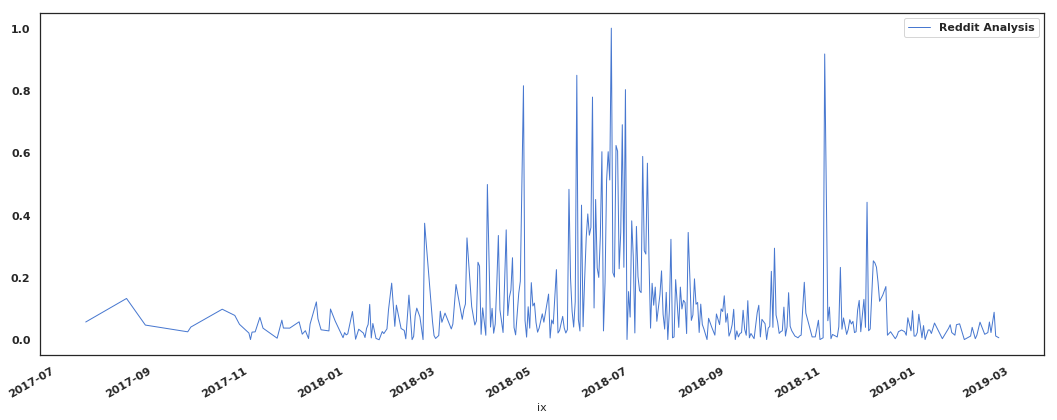

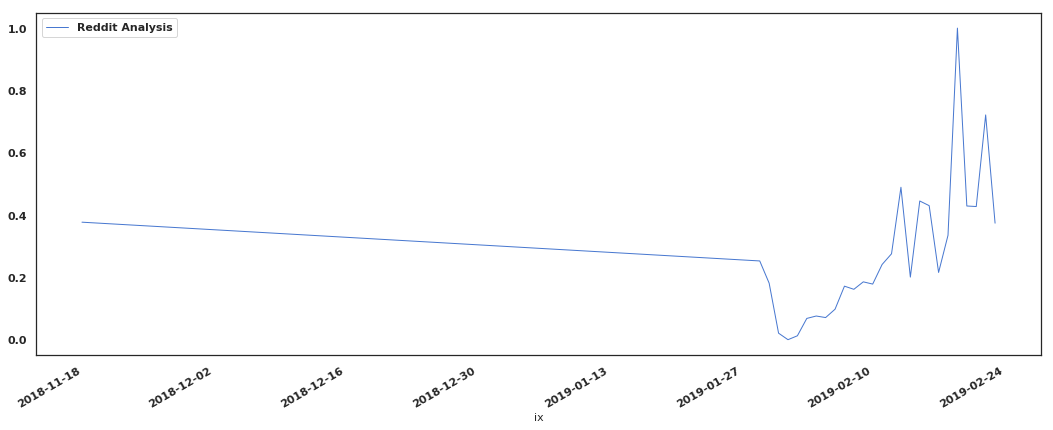

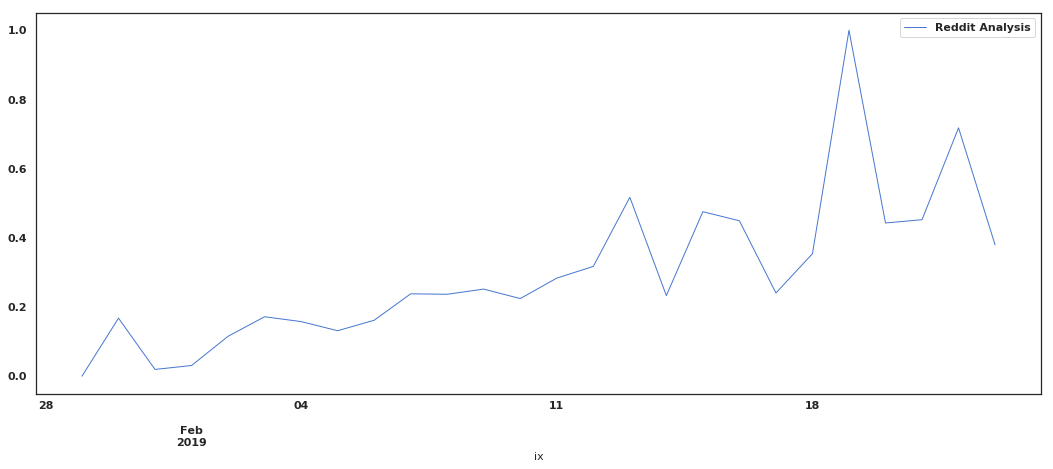

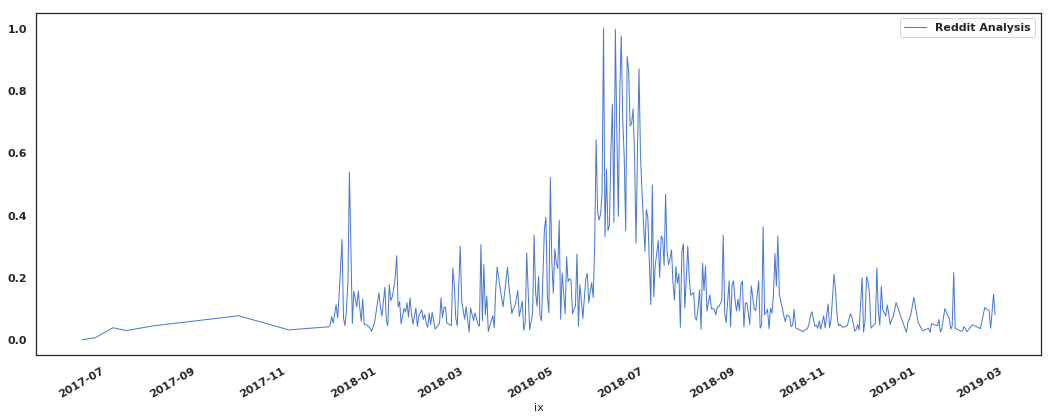

In [65]:
ntx = 0
for i in sen[4::6]:
    df = pd.read_csv(i)
    df = df.groupby(['date'])['scorexcomp'].sum()
    df = df.to_frame()
    df = df.rename(columns = {'scorexcomp' : 'Reddit Analysis'})
    df['ix'] = df.index
    df['ix'] = pd.to_datetime(df['ix'])
    df.set_index('ix', inplace = True)
    df.sort_index(inplace = True)
    merge = df
    nc = [i for i in merge.columns if i != 'date']
    merge.ix[:, nc] = (merge.ix[:, nc] - merge.ix[:, nc].min()) / (merge.ix[:, nc].max() - merge.ix[:, nc].min())
    merge.sort_index(inplace = True)
    merge.plot(lw=1, figsize=(18,7))
    ntx += 1

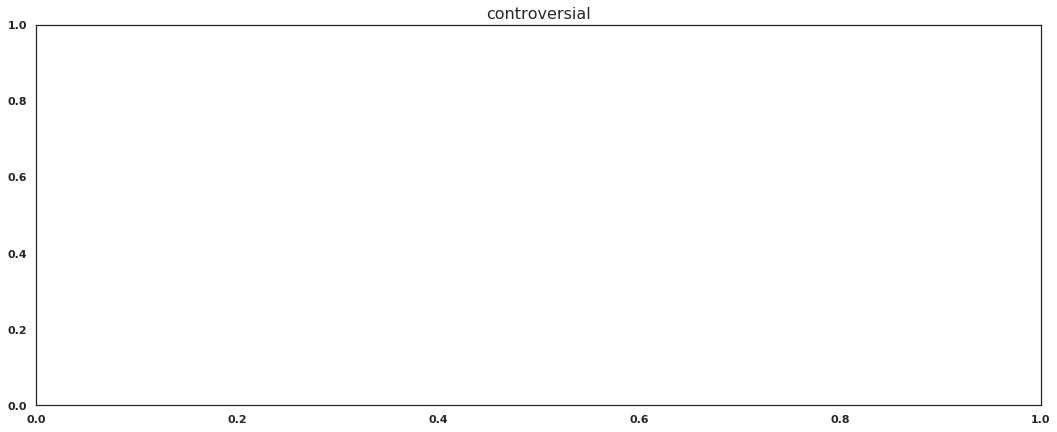

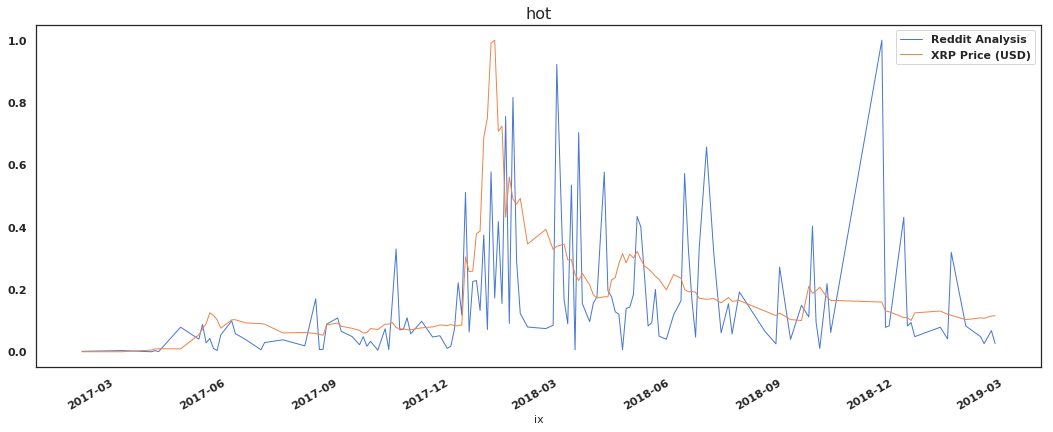

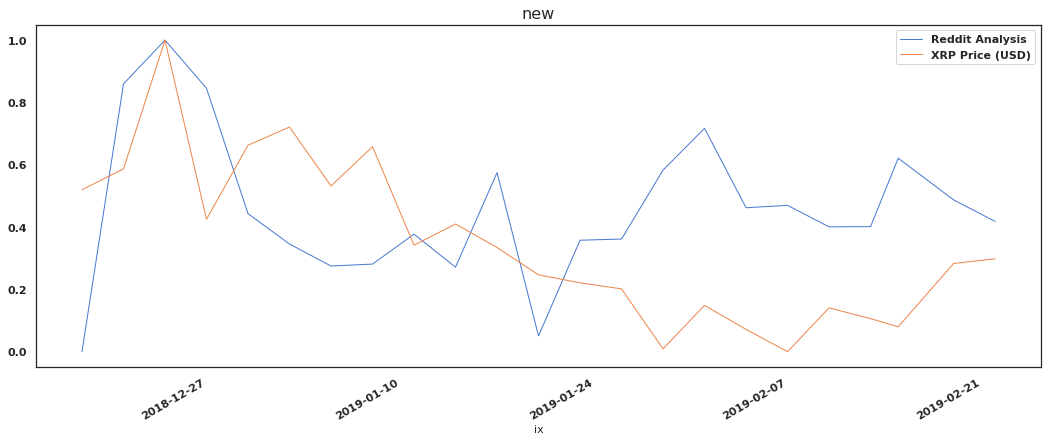

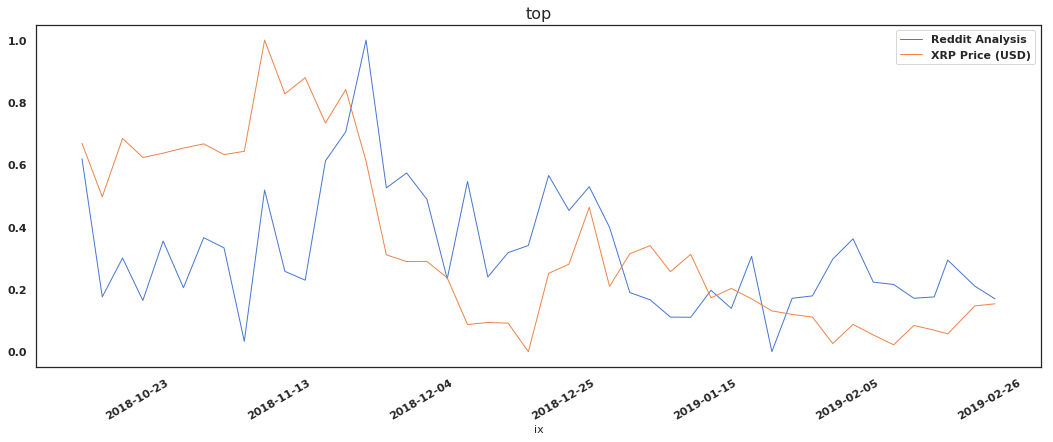

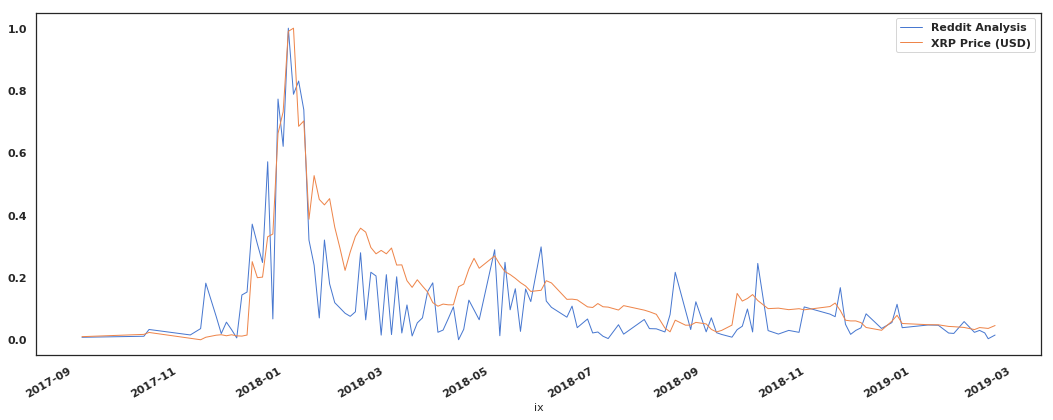

In [61]:
ntx = 0
for i, j in zip(sen[5::6], pls):
    df = pd.read_csv(i)
    df = df.groupby(['date'])['scorexcomp'].sum()
    df = df.to_frame()
    df = df.rename(columns = {'scorexcomp' : 'Reddit Analysis'})
    df['ix'] = df.index
    df['ix'] = pd.to_datetime(df['ix'])
    df.set_index('ix', inplace = True)
    df.sort_index(inplace = True)
    merge = pd.merge(df, dfbtc, on='ix', how='inner')
    nc = [i for i in merge.columns if i != 'date']
    merge.ix[:, nc] = (merge.ix[:, nc] - merge.ix[:, nc].min()) / (merge.ix[:, nc].max() - merge.ix[:, nc].min())
    merge.sort_index(inplace = True)
    plt.title(j)
    merge.plot(lw=1, figsize=(18,7))
    plt.savefig(f'xrpredo{ntx}.jpg')
    ntx += 1

In [151]:
dfbtc.tail()

,close
ix,
2016-05-26,0.005659
2016-05-29,0.005574
2016-06-01,0.005774
2016-06-04,0.005750
2016-06-07,0.005727


In [150]:
df.head()

,scorexcomp
ix,
2017-12-21,373.226705
2018-12-18,20.135921
2018-12-19,168.510572
2018-12-20,97.163068
2018-12-21,126.102810


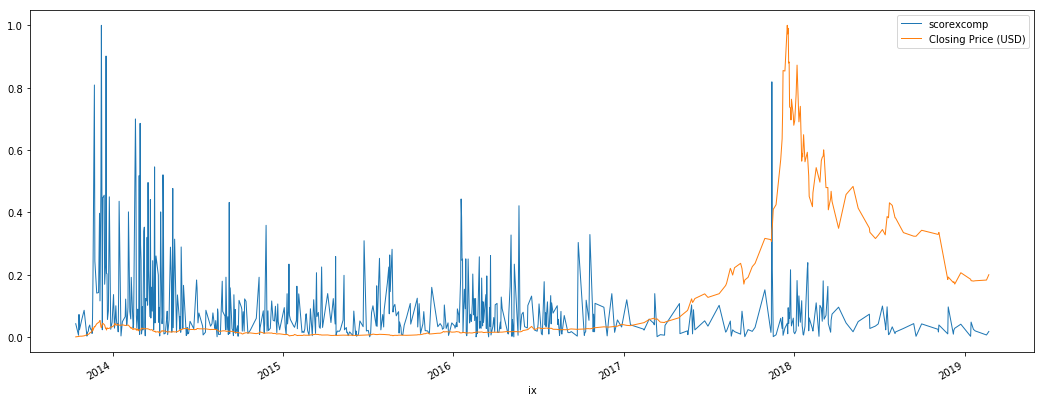

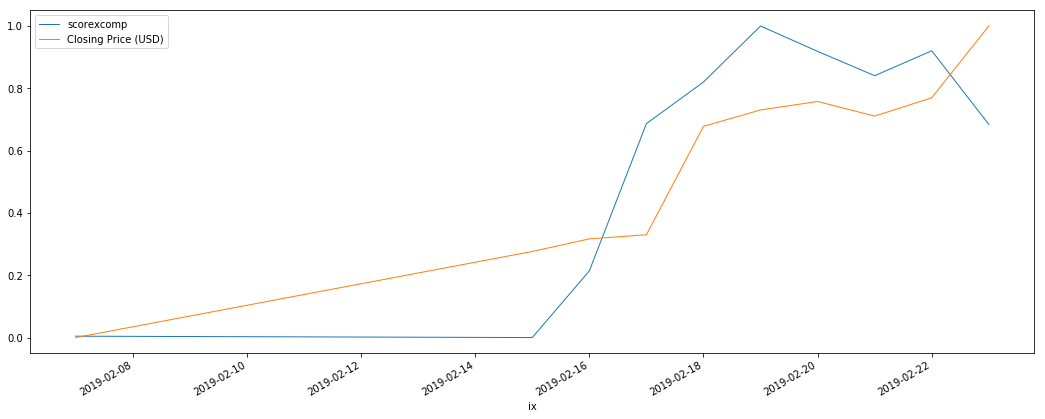

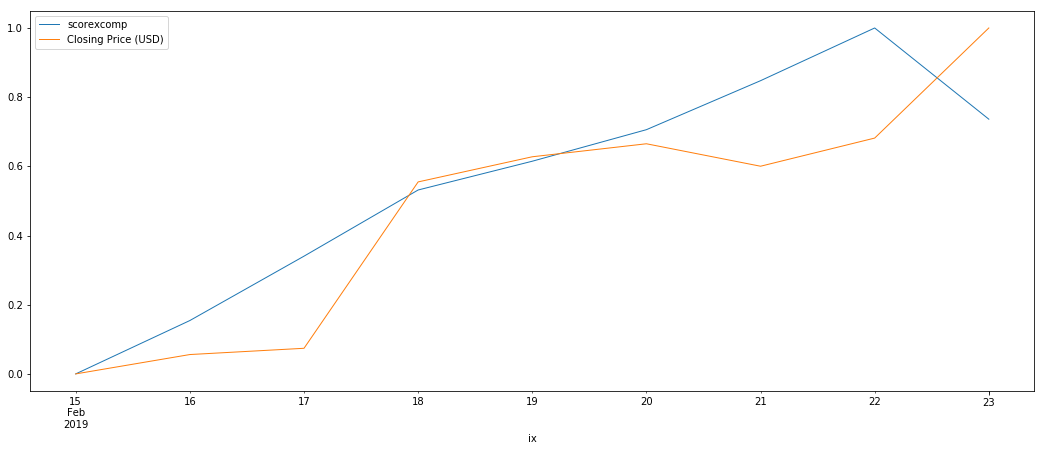

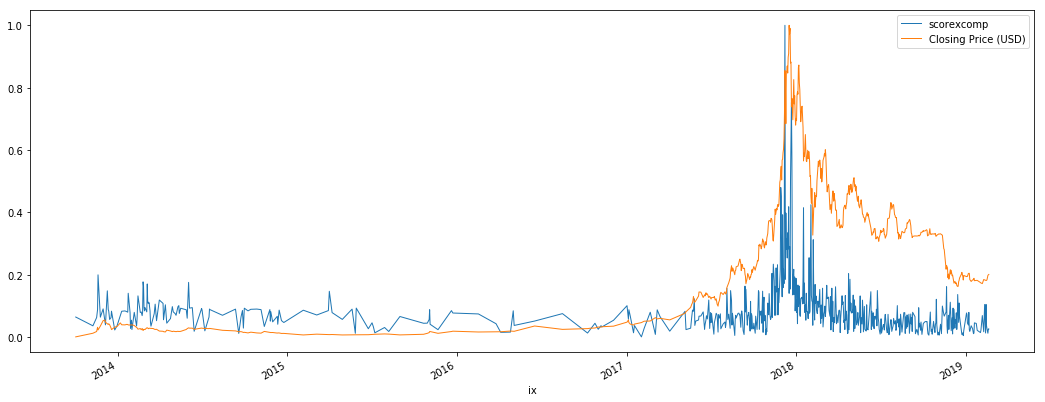

In [103]:
nc = [i for i in merge.columns if i != 'date']
ntx = 0
for i in sen[1::6]:
    df = pd.read_csv(i)
    df = df.groupby(['date'])['scorexcomp'].sum()
    df = df.to_frame()
    df['ix'] = df.index
    df['ix'] = pd.to_datetime(df['ix'])
    df.set_index('ix', inplace = True)
    df.sort_index(inplace = True)
    merge = pd.merge(df, dfbtc, on='ix', how='inner')
    merge.ix[:, nc] = (merge.ix[:, nc] - merge.ix[:, nc].min()) / (merge.ix[:, nc].max() - merge.ix[:, nc].min())
    merge.sort_index(inplace = True)
    merge.plot(lw=1, figsize=(18,7))
    plt.savefig(f'nt{ntx}.jpg')
    ntx += 1

In [105]:
df.head()

,scorexcomp
ix,
2013-03-28,221.793012
2013-04-09,436.735201
2013-04-11,356.457300
2013-10-03,703.848665
2013-11-09,418.759907


In [106]:
lols = [val1, val2, val3]
for i in sen[1::6]:
    df = pd.read_csv(i)
    df = df.groupby(['date'])['scorexcomp'].sum()
    

SyntaxError: invalid syntax (<ipython-input-106-d08309903b18>, line 1)

In [ ]:
models = [LinearRegression(),
         RandomForestRegressor(),
         KNeighborsRegressor(n_neighbors=8),
        # Lasso(),
         Ridge()
        ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]

    # fit model on training dataset
    model.fit(Xtrn, Ytrn)

    # predict prices for test dataset and calculate r^2
    tmp['R2_Valuation'] = r2_score(Ytest, model.predict(Xtest))

    # write obtained data
    TestModels = TestModels.append([tmp])



TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Valuation.plot(ax=axes, kind='barh', title='R2_Valuation')
plt.show()
TestModels
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('Linear',   LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('RF_R', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, Xtrn, Ytrn, cv=5)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
pattern = re.compile(r'^\d{2}-\d{2}-\d{2}')
curr = ['./bitcoin/', './bitcoincash/', './ethereum/']
dtym = list(range(1,13))
time = []
ix = -1
for i in com[:3]:
    df = pd.read_csv(i, index_col = 0)
#     df.drop(df.columns[0], axis = 1, inplace = True)
    for i in df.date:
        ix += 1
        x = pattern.findall(str(i))
        if len(x) > 0:
            for j in x:
                time.append( '20' + j)
        else:
            df.drop(ix, inplace = True)
    df['date'] = pd.DataFrame({'date' : time})
    for h in curr:
        place = f'{h[:-1]}'
        os.mkdir(place)
        for i in range(2001,2020):
            try:
                i = int(i)
                dt = [j for (j, k) in enumerate(time, 1) if i <= int(k[:4]) < (i + 1)]
                dt = df.iloc[dt]
                file = f'{h}controversial_{str(i)}'    
                dt.to_csv(file, columns = dt)
                place = f'{h}{str(i)}'
                os.mkdir(place)
                for l in dtym:
                    place = f'{h}{str(i)}/{l}'
#                     dtym = [j for (j, k) in enumerate(time, 1) if i <= int(k[6:8]) < (i + 1)]
#                     dtym = df.iloc[dt]
                    os.mkdir(place)
#                     file = f'{h}{l}/controversial_{str(i)}_{str(l)}'    
#                     dt.to_csv(file, columns = dt)
            except:
                pass